In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [24]:
# データ生成（多重共線性を含む）
np.random.seed(42)
n_samples = 200  # サンプル数
X1 = np.random.rand(n_samples) * 10
X2 = 2 * X1 + np.random.normal(0, 0.1, n_samples)  # X1と強い相関を持つ
X3 = np.random.rand(n_samples) * 10
y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 2, n_samples)  # 目的変数

# データフレーム化
data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})

# モデル構築用データと評価用データに分割
train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

X_train = train_data[["X1", "X2", "X3"]]
y_train = train_data["y"]
X_test = test_data[["X1", "X2", "X3"]]
y_test = test_data["y"]

In [25]:


# Ridge回帰を使用して重回帰分析とリッジ回帰を統合
alphas = [0, 1.0]  # alpha=0で重回帰分析, alpha=1.0でリッジ回帰
results = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 結果を記録
    results.append({
        "alpha": alpha,
        "coefficients": model.coef_,
        "intercept": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

# 結果を表示
for result in results:
    print(f"--- alpha = {result['alpha']} ---")
    print("回帰係数:", result["coefficients"])
    print("切片:", result["intercept"])
    print("R^2スコア（テストデータ）:", result["R2"])
    print("RMSE（テストデータ）:", result["RMSE"])


--- alpha = 0 ---
回帰係数: [-1.51708035  4.28800747 -0.93978243]
切片: -0.5419648061637155
R^2スコア（テストデータ）: 0.9904253965863228
RMSE（テストデータ）: 2.066075614562788
--- alpha = 1.0 ---
回帰係数: [ 0.96724899  3.0449324  -0.93847369]
切片: -0.5319950582350472
R^2スコア（テストデータ）: 0.9906084283349904
RMSE（テストデータ）: 2.0462323819173056


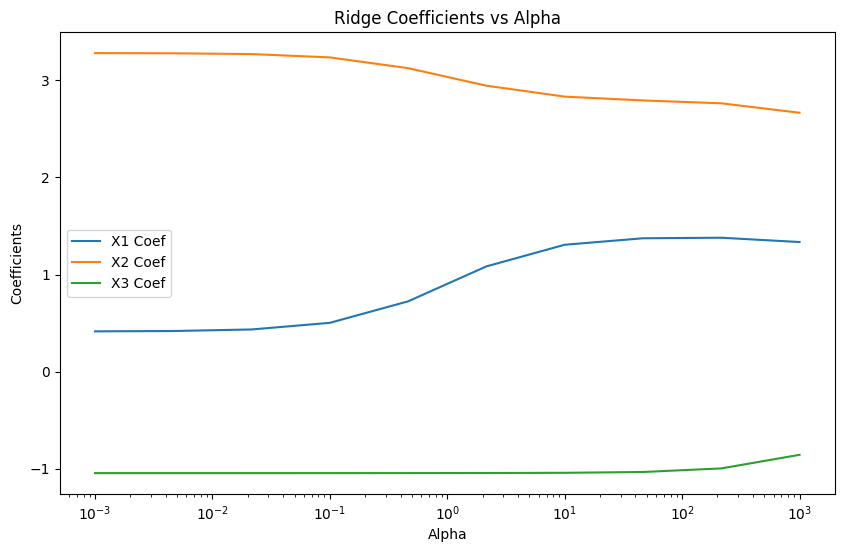

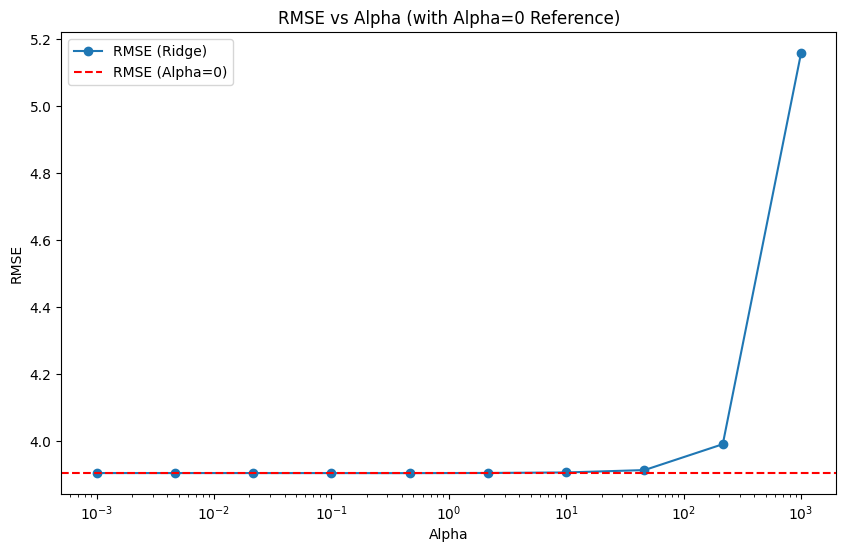

In [60]:

# alphaを広範囲で調査（リッジ回帰の挙動を確認）
alphas = np.logspace(-3, 3, 10)
ridge_coefs = []
ridge_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    ridge_coefs.append(model.coef_)
    ridge_scores.append(mean_squared_error(y_test, model.predict(X_test)))

ridge_coefs = np.array(ridge_coefs)


# alpha=0（重回帰）のRMSEを計算
model = Ridge(alpha=0)
model.fit(X_train, y_train)
rmse_alpha_0 = mean_squared_error(y_test, model.predict(X_test))

# リッジ回帰の回帰係数の変化をプロット
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs[:, 0], label="X1 Coef")
plt.plot(alphas, ridge_coefs[:, 1], label="X2 Coef")
plt.plot(alphas, ridge_coefs[:, 2], label="X3 Coef")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficients")
plt.title("Ridge Coefficients vs Alpha")
plt.legend()
plt.show()

# リッジ回帰のRMSE変化をプロット（alpha=0の値を追加）
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, label="RMSE (Ridge)", marker="o")
plt.axhline(y=rmse_alpha_0, color="r", linestyle="--", label="RMSE (Alpha=0)")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs Alpha (with Alpha=0 Reference)")
plt.legend()
plt.show()

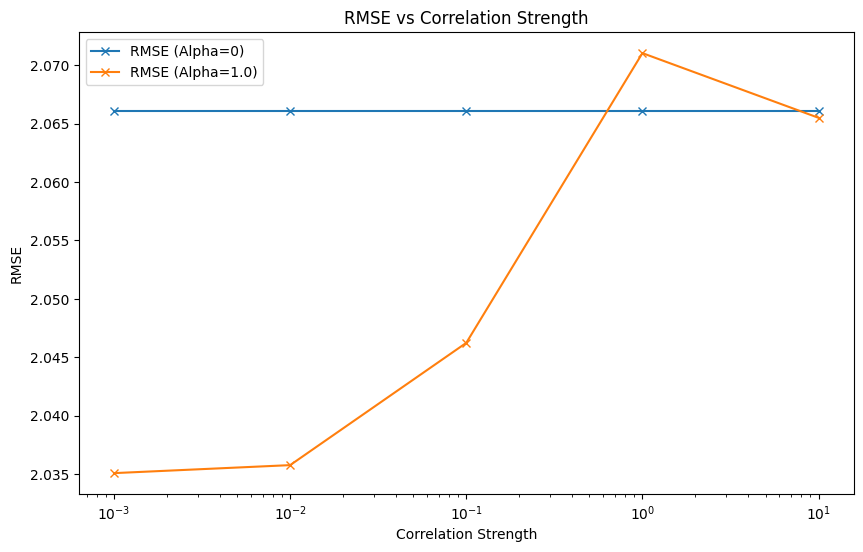

In [61]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 多重共線性の強さを変える実験
correlation_strengths =[0.001, 0.01, 0.1, 1, 10]
n_samples = 200  # サンプル数
results = []

for strength in correlation_strengths:
    np.random.seed(42)
    # 説明変数の生成
    X1 = np.random.rand(n_samples) * 10
    X2 = 2 * X1 + np.random.normal(0, strength, n_samples)
    X3 = np.random.rand(n_samples) * 10
    y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 2, n_samples)  # 目的変数

    # データ分割
    data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})
    train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

    X_train = train_data[["X1", "X2", "X3"]]
    y_train = train_data["y"]
    X_test = test_data[["X1", "X2", "X3"]]
    y_test = test_data["y"]

    # 重回帰分析 (Ridge alpha=0)
    model = Ridge(alpha=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Correlation Strength": strength,
        "Alpha": 0,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

    # リッジ回帰 (alpha=1.0)
    model_ridge = Ridge(alpha=1.0)
    model_ridge.fit(X_train, y_train)
    y_pred_ridge = model_ridge.predict(X_test)

    results.append({
        "Correlation Strength": strength,
        "Alpha": 1.0,
        "Coefficients": model_ridge.coef_,
        "Intercept": model_ridge.intercept_,
        "R2": r2_score(y_test, y_pred_ridge),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    })
results_df = pd.DataFrame(results)


# RMSEのプロット
plt.figure(figsize=(10, 6))
for alpha in [0, 1.0]:  # alpha=0が重回帰、alpha=1がリッジ回帰
    subset = results_df[results_df["Alpha"] == alpha]
    plt.plot(
        subset["Correlation Strength"],
        subset["RMSE"],
        label=f"RMSE (Alpha={alpha})",
        marker="x",
    )
plt.xscale("log")
plt.xlabel("Correlation Strength")
plt.ylabel("RMSE")
plt.title("RMSE vs Correlation Strength")
plt.legend()
plt.show()

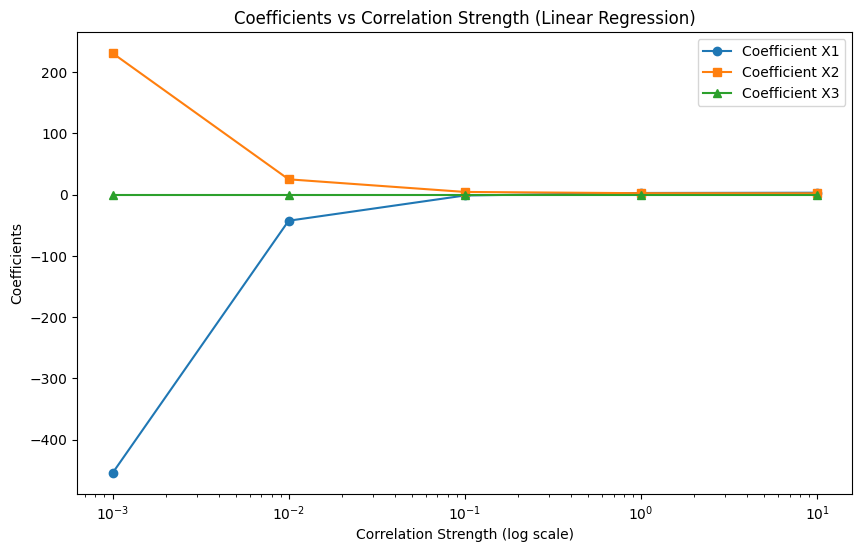

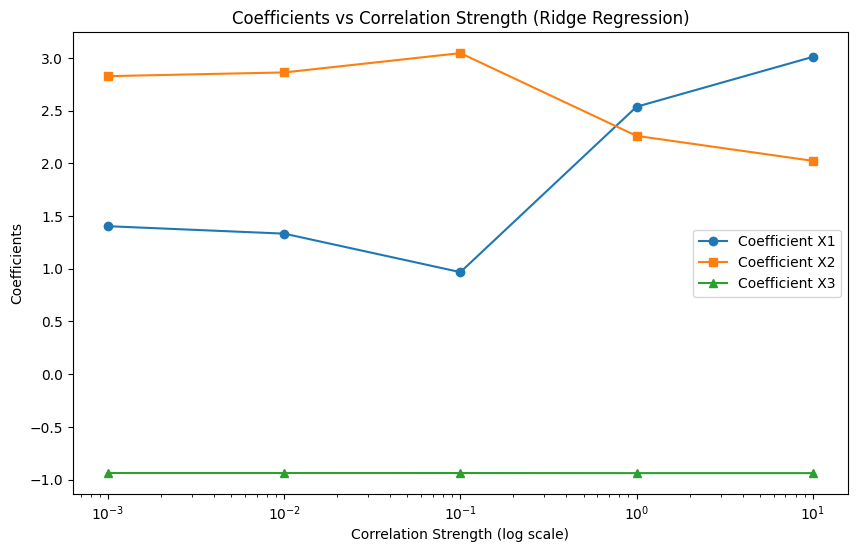

In [56]:
coefficients = []

for alpha in [0, 1.0]:  # alpha=0が重回帰、alpha=1がリッジ回帰
    subset = results_df[results_df["Alpha"] == alpha]
    for _, row in subset.iterrows():
        coefficients.append({
            "Correlation Strength": row["Correlation Strength"],
            "Alpha": alpha,
            "Coefficient X1": row["Coefficients"][0],
            "Coefficient X2": row["Coefficients"][1],
            "Coefficient X3": row["Coefficients"][2],
        })

coefficients_df = pd.DataFrame(coefficients)
# 重回帰 (alpha=0) のプロット
plt.figure(figsize=(10, 6))
subset = coefficients_df[coefficients_df["Alpha"] == 0]
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X1"], label="Coefficient X1", marker="o"
)
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X2"], label="Coefficient X2", marker="s"
)
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X3"], label="Coefficient X3", marker="^"
)

plt.xscale("log")
plt.xlabel("Correlation Strength (log scale)")
plt.ylabel("Coefficients")
plt.title("Coefficients vs Correlation Strength (Linear Regression)")
plt.legend()
plt.show()

# リッジ回帰 (alpha=1.0) のプロット
plt.figure(figsize=(10, 6))
subset = coefficients_df[coefficients_df["Alpha"] == 1.0]
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X1"], label="Coefficient X1", marker="o"
)
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X2"], label="Coefficient X2", marker="s"
)
plt.plot(
    subset["Correlation Strength"], subset["Coefficient X3"], label="Coefficient X3", marker="^"
)

plt.xscale("log")
plt.xlabel("Correlation Strength (log scale)")
plt.ylabel("Coefficients")
plt.title("Coefficients vs Correlation Strength (Ridge Regression)")
plt.legend()
plt.show()

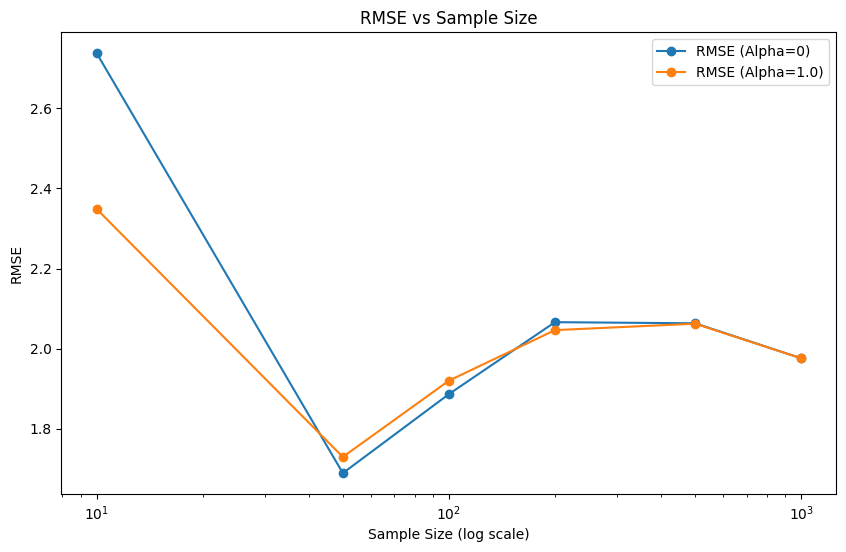

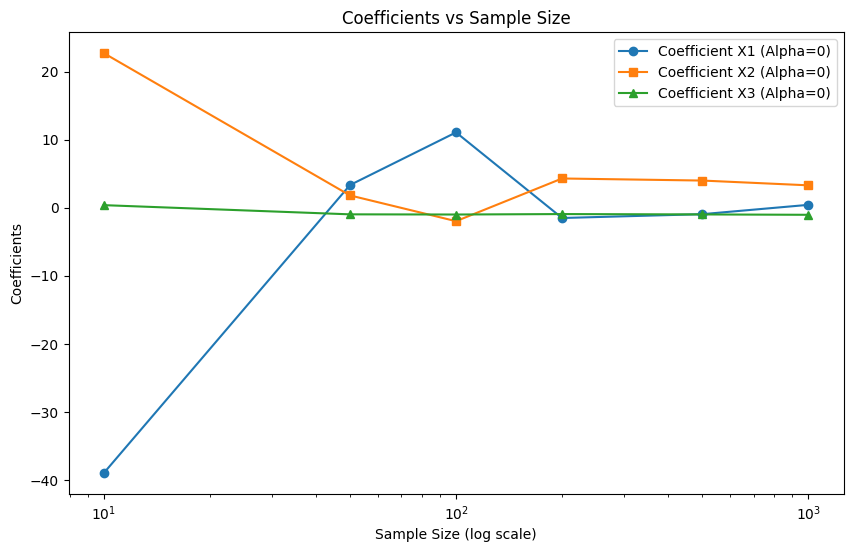

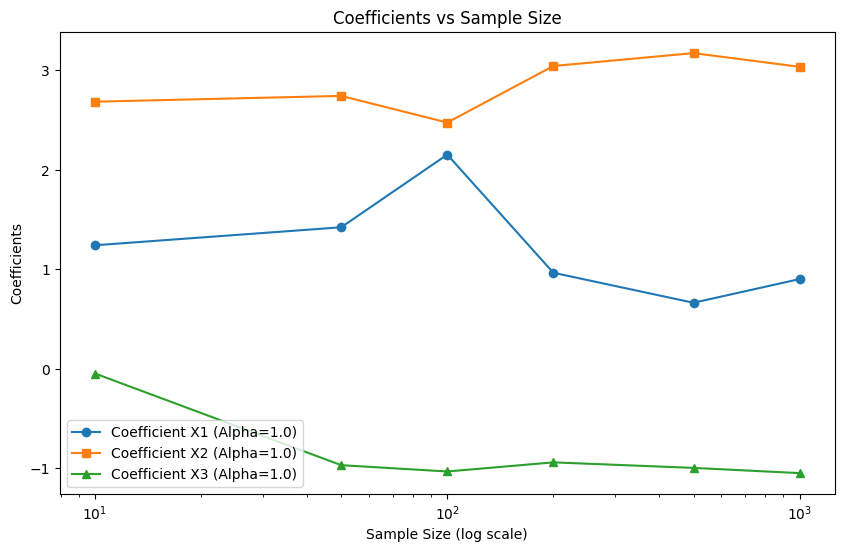

In [53]:
sample_sizes = [10, 50, 100, 200, 500, 1000]  # サンプル数の設定
correlation_strength = 0.01  # 固定された多重共線性の強さ
results_sample_size = []

for n_samples in sample_sizes:
    np.random.seed(42)
    # 説明変数の生成
    X1 = np.random.rand(n_samples) * 10
    X2 = 2 * X1 + np.random.normal(0, correlation_strength, n_samples) * 10
    X3 = np.random.rand(n_samples) * 10
    y = 3 * X1 + 2 * X2 - X3 + np.random.normal(0, 2, n_samples)  # 目的変数

    # データ分割
    data = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})
    train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

    X_train = train_data[["X1", "X2", "X3"]]
    y_train = train_data["y"]
    X_test = test_data[["X1", "X2", "X3"]]
    y_test = test_data["y"]

    # 重回帰分析 (Ridge alpha=0)
    model = Ridge(alpha=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_sample_size.append({
        "Sample Size": n_samples,
        "Alpha": 0,
        "Coefficients": model.coef_,
        "Intercept": model.intercept_,
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    })

    # リッジ回帰 (alpha=1.0)
    model_ridge = Ridge(alpha=1.0)
    model_ridge.fit(X_train, y_train)
    y_pred_ridge = model_ridge.predict(X_test)

    results_sample_size.append({
        "Sample Size": n_samples,
        "Alpha": 1.0,
        "Coefficients": model_ridge.coef_,
        "Intercept": model_ridge.intercept_,
        "R2": r2_score(y_test, y_pred_ridge),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    })

results_sample_size_df = pd.DataFrame(results_sample_size)

# プロット: RMSE vs サンプル数
plt.figure(figsize=(10, 6))
for alpha in [0, 1.0]:
    subset = results_sample_size_df[results_sample_size_df["Alpha"] == alpha]
    plt.plot(
        subset["Sample Size"],
        subset["RMSE"],
        label=f"RMSE (Alpha={alpha})",
        marker="o",
    )

plt.xscale("log")
plt.xlabel("Sample Size (log scale)")
plt.ylabel("RMSE")
plt.title("RMSE vs Sample Size")
plt.legend()
plt.show()

# プロット: 回帰係数 vs サンプル数
coefficients_sample_size = []

for alpha in [0, 1.0]:
    subset = results_sample_size_df[results_sample_size_df["Alpha"] == alpha]
    for _, row in subset.iterrows():
        coefficients_sample_size.append({
            "Sample Size": row["Sample Size"],
            "Alpha": alpha,
            "Coefficient X1": row["Coefficients"][0],
            "Coefficient X2": row["Coefficients"][1],
            "Coefficient X3": row["Coefficients"][2],
        })

coefficients_sample_size_df = pd.DataFrame(coefficients_sample_size)

plt.figure(figsize=(10, 6))
alpha = 0
subset = coefficients_sample_size_df[coefficients_sample_size_df["Alpha"] == alpha]
plt.plot(
    subset["Sample Size"], subset["Coefficient X1"], label=f"Coefficient X1 (Alpha={alpha})", marker="o"
)
plt.plot(
    subset["Sample Size"], subset["Coefficient X2"], label=f"Coefficient X2 (Alpha={alpha})", marker="s"
)
plt.plot(
    subset["Sample Size"], subset["Coefficient X3"], label=f"Coefficient X3 (Alpha={alpha})", marker="^"
)

plt.xscale("log")
plt.xlabel("Sample Size (log scale)")
plt.ylabel("Coefficients")
plt.title("Coefficients vs Sample Size")
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
alpha = 1.0
subset = coefficients_sample_size_df[coefficients_sample_size_df["Alpha"] == alpha]
plt.plot(
    subset["Sample Size"], subset["Coefficient X1"], label=f"Coefficient X1 (Alpha={alpha})", marker="o"
)
plt.plot(
    subset["Sample Size"], subset["Coefficient X2"], label=f"Coefficient X2 (Alpha={alpha})", marker="s"
)
plt.plot(
    subset["Sample Size"], subset["Coefficient X3"], label=f"Coefficient X3 (Alpha={alpha})", marker="^"
)

plt.xscale("log")
plt.xlabel("Sample Size (log scale)")
plt.ylabel("Coefficients")
plt.title("Coefficients vs Sample Size")
plt.legend()
plt.show()